# Copy items-Copy1.csv file into pandas dataframe and 
# replace all fields that are empty with NaN

In [2]:
import pandas as pd
import numpy as np

# read dataset into pandas dataframe
df_items = pd.read_csv('items-Copy1.csv')

# replace field that's entirely space (or empty) with NaN
df_items = df_items.replace(np.nan, '', regex=True)

data_text = df_items[['description']]
data_text['index'] = data_text.index

documents = data_text

/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [3]:
len(documents)

3012

In [4]:
documents[:5]

,description,index
0,Black American racial experience is real. We s...,0
1,The best costume for Halloween worth posting. ...,1
2,"Keep on whining and crying for your president,...",2
3,"End the whining and crying, end the riots with...",3
4,Black girls are the definition of national gre...,4


# Need to perform the following steps:
1. Tokenization -- split text into sequences and sentences into words.
    Lowercase all words and remove punctuation.
2. Remove words with fewer than 3 characters
3. Remove stopwords
4. Lemmatize words -- words in third person are changed to first person
    and verbs in past and future tenses are changed into present.
5. Stem words --  words are reduced to root form.

## gensim and nltk libraries will be used to 
## implement this.

In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tobbylie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Lemmatize example

In [7]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


# Stemmer Example

In [8]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied', 'died', 'agreed', 'owned',
                  'humbled', 'sized', 'meeting', 'stating', 'siezing', 'itemization', 'sensational',
                  'traditional', 'reference', 'colonizer', 'plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data={'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


# Function in order to lemmatize and stem
# preprocess on the dataset

In [9]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [10]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Initialize stemmer

In [11]:
stemmer = SnowballStemmer('english')

# Display before and after of preprocessing on
# example document

In [12]:
doc_sample = documents[documents['index'] == 3].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['End', 'the', 'whining', 'and', 'crying,', 'end', 'the', 'riots', 'with', 'these', 'same', 'white\npeople(democrats),', 'who', 'will', 'not', 'march', 'with', 'you', 'when', 'your', 'son,', 'daughter', 'or\nloved', 'one', 'gets', 'shot', 'for', 'being', 'Black.\n\nI', 'opted', 'out', 'of', 'the', 'elections', 'and', 'i', 'had', 'many', 'Black', 'people', 'all', 'up', 'in', 'my', 'case,\ntelling', 'me', 'how', 'i', 'was', 'wrong', 'and', 'how', 'i', 'needed', 'to', 'make', 'my', 'vote', 'count', 'for', 'Mrs.\nClinton,', 'all', 'just', 'to', 'make', 'sure', 'Trump', "doesn't", 'become', 'president.\n\nWell', 'now', 'all', 'i', 'want', 'to', 'say', 'is', 'get', 'over', 'Trump', 'and', 'Clinton,', 'they', 'are', 'rich', 'white\npeople,', 'the', 'elite', 'who', 'were', 'born', 'into', 'and', 'are', 'a', 'part', 'of', 'the', 'system.\n\nI', 'dream', 'of', 'liberation,', 'not', 'staying', 'a', 'slave', 'under', 'Hillary', 'or', 'Trump,', 'so', 'forget\nyour', 'Childish', 

# Preprocess all description field text
# Save result in 'processed_docs'

In [13]:
processed_docs = documents['description'].map(preprocess)
processed_docs[:10]

0    [black, american, racial, experi, real, suppor...
1    [best, costum, halloween, worth, post, power, ...
2    [whine, cri, presid, wasn, elect, imma, care, ...
3    [whine, cri, riot, white, peopl, democrat, mar...
4                [black, girl, definit, nation, great]
5    [imma, stay, comfi, untouch, work, hard, care,...
6    [disgust, video, circul, internet, show, unide...
7                           [imit, life, photo, great]
8    [america, racial, oppress, racism, ancient, hi...
9    [donald, john, trump, elect, presid, unit, sta...
Name: description, dtype: object

# Create Bag of Words with Data set
## Start with creating dictionary with number of times a word appears in training set then filter out tokens that appear in:
1. less than 15 documents OR
2. more than 0.5 documents
### * Keep only first 100000 most frequent tokens

In [14]:
dictionary = gensim.corpora.Dictionary(processed_docs)

dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Utilize doc2bow from gensim 

In [15]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[3000]

[(7, 1),
 (16, 1),
 (113, 1),
 (135, 1),
 (147, 1),
 (161, 2),
 (233, 1),
 (252, 1),
 (360, 1),
 (375, 1),
 (406, 3),
 (438, 1),
 (478, 1),
 (494, 1),
 (509, 1),
 (518, 1),
 (596, 1),
 (602, 1)]

# Preview BoW from sample preprocessed document

In [16]:
bow_doc_3000 = bow_corpus[3000]
for i in range(len(bow_doc_3000)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_3000[i][0],
                                                     dictionary[bow_doc_3000[i][0]],
                                                     bow_doc_3000[i][1]))

Word 7 ("peopl") appears 1 time.
Word 16 ("educ") appears 1 time.
Word 113 ("month") appears 1 time.
Word 135 ("free") appears 1 time.
Word 147 ("prove") appears 1 time.
Word 161 ("communiti") appears 2 time.
Word 233 ("believ") appears 1 time.
Word 252 ("proud") appears 1 time.
Word 360 ("meet") appears 1 time.
Word 375 ("charlott") appears 1 time.
Word 406 ("legal") appears 3 time.
Word 438 ("have") appears 1 time.
Word 478 ("announc") appears 1 time.
Word 494 ("basi") appears 1 time.
Word 509 ("provid") appears 1 time.
Word 518 ("night") appears 1 time.
Word 596 ("empow") appears 1 time.
Word 602 ("focus") appears 1 time.


# Create tf-idf model using models.tfidfmodel on
# bow_corpus

In [17]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
# from pprint import pprint
# for doc in corpus_tfidf:
#     pprint(doc)

# Train LDA model using gensim.models.LdaMulticore
# Save to 'lda_model'

In [18]:
lda_model = gensim.models.LdaMulticore(
    bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

# For each topic, explore the words occuring in that
# topic and the relative weight

In [19]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.029*"black" + 0.019*"like" + 0.016*"life" + 0.015*"join" + 0.014*"need" + 0.014*"year" + 0.013*"free" + 0.013*"stop" + 0.011*"peopl" + 0.011*"communiti"
Topic: 1 
Words: 0.086*"black" + 0.044*"communiti" + 0.037*"matter" + 0.025*"support" + 0.024*"join" + 0.019*"life" + 0.018*"live" + 0.017*"patriot" + 0.015*"polic" + 0.015*"year"
Topic: 2 
Words: 0.027*"defens" + 0.025*"school" + 0.025*"free" + 0.023*"seif" + 0.022*"join" + 0.021*"class" + 0.019*"friend" + 0.018*"bring" + 0.018*"feel" + 0.017*"event"
Topic: 3 
Words: 0.027*"black" + 0.024*"https" + 0.020*"facebook" + 0.020*"follow" + 0.017*"america" + 0.015*"william" + 0.015*"peopl" + 0.012*"twitter" + 0.012*"communiti" + 0.012*"proud"
Topic: 4 
Words: 0.021*"repost" + 0.018*"like" + 0.016*"offic" + 0.013*"woman" + 0.013*"live" + 0.012*"news" + 0.012*"transgend" + 0.011*"black" + 0.011*"polic" + 0.010*"shoot"
Topic: 5 
Words: 0.024*"https" + 0.023*"follow" + 0.016*"american" + 0.015*"peopl" + 0.013*"instagram" + 0.0

# Attempt distinguishing topics using words in each
# topic and their corresponding weights

## Run LDA using tf-idf

In [20]:
lda_model_tfidf = gensim.models.LdaMulticore(
    corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.021*"black" + 0.017*"matter" + 0.013*"polic" + 0.013*"girl" + 0.012*"year" + 0.012*"live" + 0.010*"nation" + 0.009*"join" + 0.008*"educ" + 0.008*"say"
Topic: 1 Word: 0.018*"join" + 0.018*"beauti" + 0.018*"black" + 0.015*"proud" + 0.014*"want" + 0.013*"heart" + 0.013*"america" + 0.011*"texa" + 0.011*"live" + 0.011*"girl"
Topic: 2 Word: 0.016*"immigr" + 0.014*"welcom" + 0.014*"music" + 0.014*"free" + 0.014*"facemus" + 0.013*"listen" + 0.012*"communiti" + 0.012*"meme" + 0.011*"need" + 0.011*"support"
Topic: 3 Word: 0.023*"muslim" + 0.023*"polic" + 0.017*"brutal" + 0.013*"right" + 0.013*"black" + 0.013*"agre" + 0.011*"free" + 0.011*"proud" + 0.010*"https" + 0.010*"train"
Topic: 4 Word: 0.014*"stand" + 0.013*"racism" + 0.012*"tell" + 0.011*"black" + 0.011*"student" + 0.011*"truth" + 0.010*"injustic" + 0.010*"goal" + 0.009*"love" + 0.009*"south"
Topic: 5 Word: 0.027*"like" + 0.015*"real" + 0.015*"black" + 0.014*"https" + 0.014*"news" + 0.013*"american" + 0.013*"refuge" + 0.0

# Evaluate performance by classifying sample
# document using LDA BoW model

In [21]:
processed_docs[3000]

['proud',
 'announc',
 'initi',
 'focus',
 'provid',
 'free',
 'legal',
 'educ',
 'empow',
 'peopl',
 'strengthen',
 'communiti',
 'believ',
 'have',
 'legal',
 'workshop',
 'month',
 'basi',
 'prove',
 'benefici',
 'tangibl',
 'communiti',
 'meet',
 'charlott',
 'legal',
 'night']

In [22]:
for index, score in sorted(lda_model[bow_corpus[3000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(
        score, lda_model.print_topic(index, 10)))


Score: 0.9590823650360107	 
Topic: 0.027*"black" + 0.024*"https" + 0.020*"facebook" + 0.020*"follow" + 0.017*"america" + 0.015*"william" + 0.015*"peopl" + 0.012*"twitter" + 0.012*"communiti" + 0.012*"proud"


# Evaluate performance by classifying sample
# document using LDA tf-idf model

In [23]:
for index, score in sorted(lda_model_tfidf[bow_corpus[3000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(
        score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9590776562690735	 
Topic: 0.016*"immigr" + 0.014*"welcom" + 0.014*"music" + 0.014*"free" + 0.014*"facemus" + 0.013*"listen" + 0.012*"communiti" + 0.012*"meme" + 0.011*"need" + 0.011*"support"


# Test model on unseen document

In [24]:
unseen_document = 'Black Facebook employees complain racism, discrimination have gotten worse'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(
        score, lda_model.print_topic(index, 5)))

Score: 0.5863615870475769	 Topic: 0.027*"black" + 0.024*"https" + 0.020*"facebook" + 0.020*"follow" + 0.017*"america"
Score: 0.28024429082870483	 Topic: 0.027*"right" + 0.022*"american" + 0.018*"polic" + 0.016*"peopl" + 0.014*"share"
Score: 0.01667768321931362	 Topic: 0.086*"black" + 0.044*"communiti" + 0.037*"matter" + 0.025*"support" + 0.024*"join"
Score: 0.016677509993314743	 Topic: 0.066*"black" + 0.025*"polic" + 0.024*"peopl" + 0.014*"white" + 0.013*"shoot"
Score: 0.01667550578713417	 Topic: 0.024*"https" + 0.023*"follow" + 0.016*"american" + 0.015*"peopl" + 0.013*"instagram"
Score: 0.01667470484972	 Topic: 0.027*"defens" + 0.025*"school" + 0.025*"free" + 0.023*"seif" + 0.022*"join"
Score: 0.016674108803272247	 Topic: 0.045*"free" + 0.040*"stop" + 0.028*"black" + 0.027*"facemus" + 0.025*"music"
Score: 0.01667366549372673	 Topic: 0.029*"black" + 0.019*"like" + 0.016*"life" + 0.015*"join" + 0.014*"need"
Score: 0.016671180725097656	 Topic: 0.033*"polic" + 0.022*"join" + 0.022*"stop" 

# Let's explore the words in the description field and form a word cloud to get a visual representation of the most common words
# Let's first remove punctuation and lowercase the words

In [48]:
# Load the regular expression library
import re
# Remove punctuation
documents['description_processed'] = documents['description'].map(
    lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
documents['description_processed'] = documents['description_processed'].map(
    lambda x: x.lower())
# Print out the first rows of papers
documents['description_processed'].head()

/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    black american racial experience is real we su...
1    the best costume for halloween worth posting p...
2    keep on whining and crying for your president ...
3    end the whining and crying end the riots with ...
4    black girls are the definition of national gre...
Name: description_processed, dtype: object

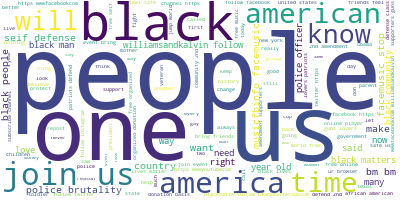

In [52]:
from wordcloud import WordCloud

# Join the different processed descriptions together
long_string = ','.join(list(documents['description_processed'].values))

# Create WordCloud object
wordcloud = WordCloud(background_color='white', max_words=5000,
                      contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloude
wordcloud.to_image()

# Plot ten most frequent words based on documents

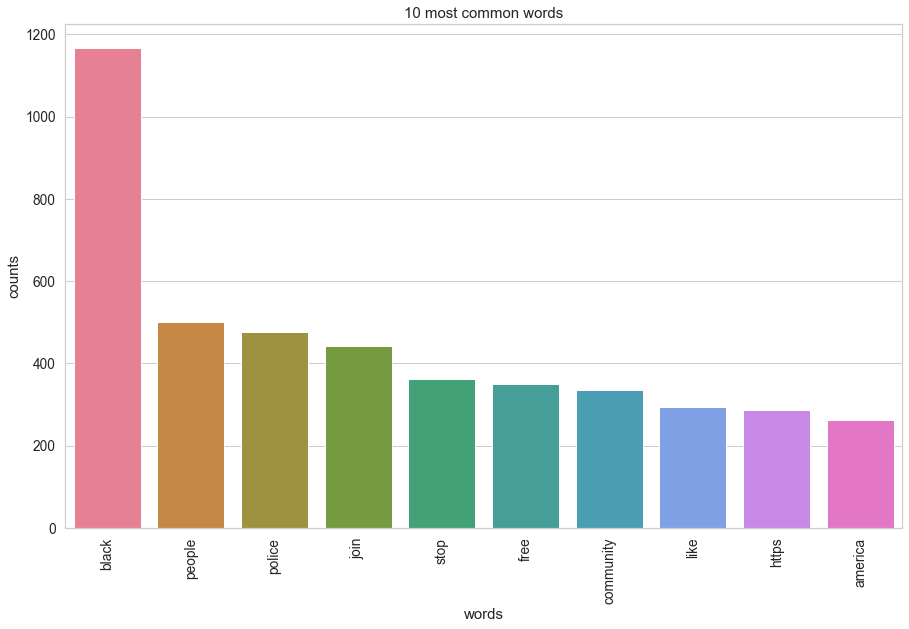

In [53]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(documents['description_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# LDA model training and results visualization

In [55]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load LDA model from sk-learn

# Helper method
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))


# Tweak the two parameters below
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
black police join man brutality matters america community shot people

Topic #1:
black 2nd guns community amendment video bm defend new supporters

Topic #2:
black veterans people american life support clinton like hillary help

Topic #3:
black free people defense join seif don feel friends like

Topic #4:
stop https follow free black music facemusic williamsandkalvin online musicfbinfo


# Let's analyze the LDA model results through visualization, we will use pyLDAvis to interact with the results in order to:
1. Understand the individual results better -- Manually select each topic to view it's top most frequent and/or "relevant terms using different values of λ. This can be of aid when assigning human interpretable name or "meaning" to each topic.
2. Understand the relationships between the topics -- Explore Intertopic Distance Plot that can assist in learning how topics relate to each other to reveal potential higher-level structure between groups of topics.

### * The alpha parameter represents document-topic density -- a higher alpha means that documents are made up of more topics and result in more specific topic distributions per document.

In [59]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

CPU times: user 6.92 s, sys: 379 ms, total: 7.3 s
Wall time: 2min 46s


/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
